## 2. Magnitudes of Optical Imaging data 
In astronomy, optical imaging data are observed in well-defined parts of the electromagnetic spectrum. Typical broad-band filters are $B$ (blue; around $450$ nm), $R$ (red; around 650 nm) and $I$ (infrared; around 800 nm). One of the more difficult tasks during processing of optical data is to calibrate the brightness (or the magnitudes) of astronomical data. It is usually easire to calibrate some bands than others.


#### Why do we use a histogram analysis for the given problem?

- Because it helps to visualize and quantify the distribution of the distance between the data points and the model. This helps us to identify the most frequent distance as the best correction.

#### Why can't we just calculate all the distance and take the distance appearing most often as an estimate for our shift? 

- because using the histogram can show a range of the distance, not a accurate value. If we use a accurate value to analyze, any noise will enormously affect the statistical result. Using histogram by applying bin helps us to smooth the data range, and the result is more reliable. 

#### What physical meaning does the bin-width of the histogram have for our problem? 

- lower bin means higher resolution, but it is more sensitive to noise, higher bin means lower resolution, but it is a more stable estimation.  

#### How large would you choose the bin-width?

- I will choose bin-width=0.05

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read data from files
data_file = 'data/stars_BRI_data.asc'
model_file = 'data/stars_BRI_model.asc'

data = np.loadtxt(data_file)
model = np.loadtxt(model_file)

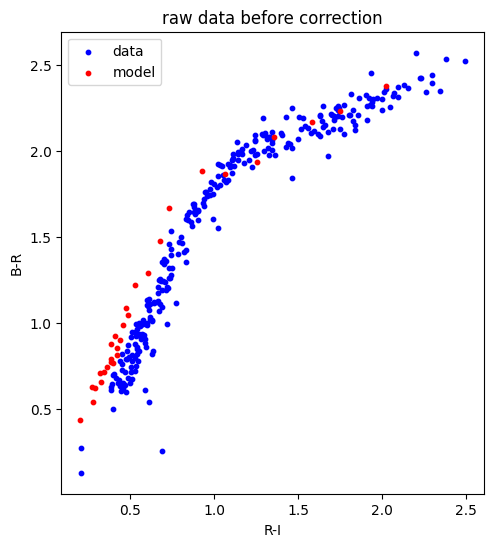

In [4]:
# extract magnitudes
B_data, R_data, I_data = data[:, 0], data[:, 1], data[:, 2]
B_model, R_model, I_model = model[:, 0], model[:, 1], model[:, 2]

# compute colors
BR_data = B_data - R_data
RI_data = R_data - I_data
BR_model = B_model - R_model
RI_model = R_model - I_model

# plot uncorrected data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(RI_data, BR_data, color='blue', label='data', s=10)
plt.scatter(RI_model, BR_model, color='red', label='model', s=10)
plt.xlabel('R-I')
plt.ylabel('B-R')
plt.title('raw data before correction')
plt.legend()

plt.show()

optimal shift for B-R: 0.00279999999999081


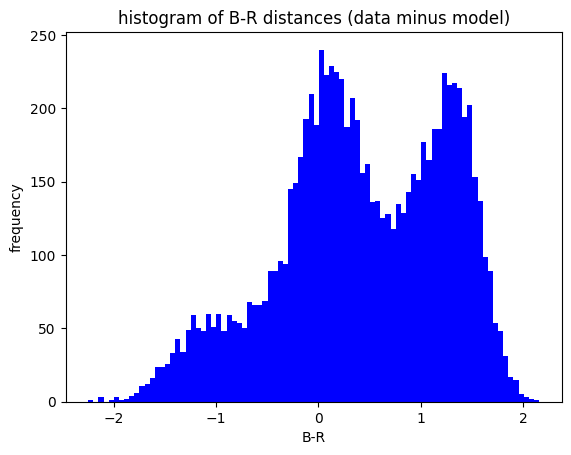

In [5]:
# calculate B-R distances
bmr_distances = BR_data[:, np.newaxis] - BR_model

# histogram analysis for B-R
bin_width = 0.05
bins = np.arange(bmr_distances.min(), bmr_distances.max() + bin_width, bin_width)
hist, bin_edges = np.histogram(bmr_distances, bins=bins)

# find optimal shift for B-R
optimal_shift_br = bin_edges[np.argmax(hist)]
print("optimal shift for B-R:", optimal_shift_br)

# plot B-R distances histogram
plt.hist(bmr_distances.flatten(), bins=bins, color='blue')
plt.xlabel('B-R')
plt.ylabel('frequency')
plt.title('histogram of B-R distances (data minus model)')
plt.show()

In [6]:
# calculate R-I distances
rir_distances = RI_data[:, np.newaxis] - RI_model

# histogram analysis for R-I
hist, bin_edges = np.histogram(rir_distances, bins=bins)

# find optimal shift for R-I
optimal_shift_ri = bin_edges[np.argmax(hist)]
print("optimal shift for R-I:", optimal_shift_ri)

optimal shift for R-I: 0.15279999999999028


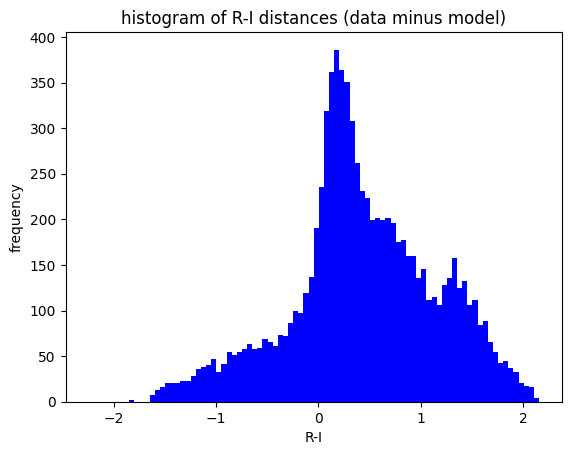

In [7]:
# plot R-I distances histogram
plt.hist(rir_distances.flatten(), bins=bins, color='blue')
plt.xlabel('R-I')
plt.ylabel('frequency')
plt.title('histogram of R-I distances (data minus model)')
plt.show()

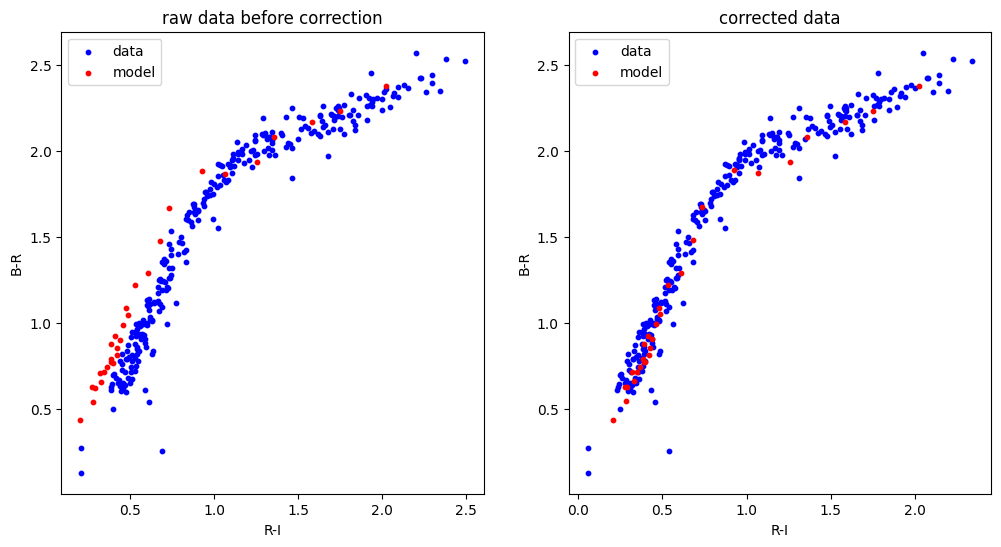

In [8]:
# apply shifts
corrected_BR_data = BR_data - optimal_shift_br
corrected_RI_data = RI_data - optimal_shift_ri

# plot corrected data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(RI_data, BR_data, color='blue', label='data', s=10)
plt.scatter(RI_model, BR_model, color='red', label='model', s=10)
plt.xlabel('R-I')
plt.ylabel('B-R')
plt.title('raw data before correction')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(corrected_RI_data, corrected_BR_data, color='blue', label='data', s=10)
plt.scatter(RI_model, BR_model, color='red', label='model', s=10)
plt.xlabel('R-I')
plt.ylabel('B-R')
plt.title('corrected data')
plt.legend()

plt.show()

## 3. Monte-Carlo Error Propagation

You have likely encountered the concept of propagation of uncertainty before in some lab-courses (see [the usual rules here](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas)). The idea is that given measurements with uncertainties, we can find the uncertainty on the final result of an equation.

For example, let us consider the following equation:

$$F = \frac{G~M_1~M_2}{r^2}$$

which gives the gravitational force between two masses $M_1$ and $M_2$ separated by a distance $r$.

Let us now imagine that we have two masses:

$$M_1=40\times10^4\pm0.05\times10^4\rm{kg}$$

and

$$M_2=30\times10^4\pm0.1\times10^4\rm{kg}$$

separated by a distance:

$$r=3.2\pm0.011~\rm{m}$$

where the uncertaintes are the standard deviations of Gaussian distributions which could be e.g. measurement errors.

We also know:

$$G = 6.67384\times10^{-11}~\rm{m}^3~\rm{kg}^{-1}~\rm{s}^{-2}$$

(exact value, no uncertainty)

Use the [standard error propagation rules](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas) to determine the resulting force and uncertainty in a `python`-program (you can just derive the equation by hand and implement it in a single line in your code).

Now, we can try using a **Monte-Carlo** technique instead. The idea behind Monte-Carlo techniques is to generate many possible solutions using random numbers and using these to look at the overall results. In the above case, you can propagate uncertainties with a Monte-Carlo method by doing the following:

* randomly sample values of $M_1$, $M_2$, and $r$, 1000000 times, using the means and standard deviations given above
  **Hint:** You can get random numbers which are distributed according to the normal (Gaussian) distribution with the `normal` command within the `numpy.random` module.

* compute the gravitational force for each set of values

You should do this with Numpy arrays, and **without any loops**. You should then get an array of 1000000 different values for the forces.

Make a plot of the normalized histogram of these values of the force, and then overplot a Gaussian function with the mean and standard deviation derived with the standard error propagation rules. Make sure that you pick the range of x values in the plot wisely, so that the two distributions can be seen. Make sure there are also a sensible number of bins in the histogram so that you can compare the shape of the histogram and the Gaussian function. The two distributions should agree pretty well.

For your reference, here is the plot that I obtain for this part of the exercise:

<img src="figs/monte_carlo_force.png" style="width: 400px;" style="height: 400px;">

The blue bars are the normalized histogram of my Monte-Carlo simulated forces. The red curve gives the Gaussian prediction for these forces from standard error propagation.  

Now repeat the experiment above with the following values:

$$M_1=40\times10^4\pm 8\times10^4\rm{kg}$$
$$M_2=30\times10^4\pm 6\times10^4\rm{kg}$$
$$r=3.2\pm 0.6~\rm{m}$$

and as above, produce a plot.

In this case, which method do you think is more accurate? Why? What do you think are the advantages of using a Monte-Carlo technique?

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [11]:
# given values and uncertainties
G = 6.67384e-11  # g-constant
M1 = 40e4  # kg
M1_err = 0.05e4  # kg
M2 = 30e4  # kg
M2_err = 0.1e4  # kg
r = 3.2  # m
r_err = 0.011  # m

# calculate force and its uncertainty using propagation of uncertainty
F = G * M1 * M2 / r**2
F_err = F * np.sqrt((M1_err/M1)**2 + (M2_err/M2)**2 + 4*(r_err/r)**2)

print(f"Force: {F} N")
print(f"Uncertainty in Force: {F_err} N")

Force: 0.7820906249999999 N
Uncertainty in Force: 0.006054979566717281 N


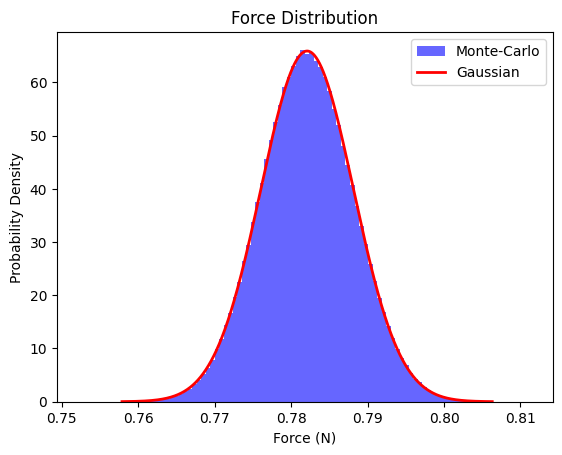

In [12]:
# number of samples
N = 1000000

# generate random samples for M1, M2, and r
M1_samples = np.random.normal(M1, M1_err, N)
M2_samples = np.random.normal(M2, M2_err, N)
r_samples = np.random.normal(r, r_err, N)

# calculate forces for each set of random samples
F_samples = G * M1_samples * M2_samples / r_samples**2

# plot histogram of forces
plt.hist(F_samples, bins=100, density=True, alpha=0.6, color='blue', label='Monte-Carlo')

# plot Gaussian distribution based on standard error propagation
x = np.linspace(F - 4*F_err, F + 4*F_err, 1000)
plt.plot(x, norm.pdf(x, F, F_err), 'r-', lw=2, label='Gaussian')

plt.xlabel('Force (N)')
plt.ylabel('Probability Density')
plt.title('Force Distribution')
plt.legend()
plt.show()


New Force: 0.7820906249999999 N
New Uncertainty in Force: 0.3673537193876039 N


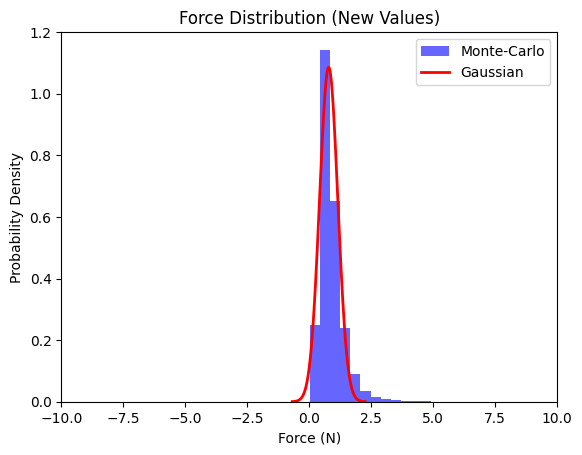

In [16]:
# new given values and uncertainties
M1_new = 40e4  
M1_err_new = 8e4 
M2_new = 30e4  
M2_err_new = 6e4  
r_new = 3.2  
r_err_new = 0.6  

# calculate force and its uncertainty using propagation of uncertainty for new values
F_new = G * M1_new * M2_new / r_new**2
F_err_new = F_new * np.sqrt((M1_err_new/M1_new)**2 + (M2_err_new/M2_new)**2 + 4*(r_err_new/r_new)**2)

print(f"New Force: {F_new} N")
print(f"New Uncertainty in Force: {F_err_new} N")

# generate random samples for new M1, M2, and r
M1_samples_new = np.random.normal(M1_new, M1_err_new, N)
M2_samples_new = np.random.normal(M2_new, M2_err_new, N)
r_samples_new = np.random.normal(r_new, r_err_new, N)

# calculate forces for each set of random samples for new values
F_samples_new = G * M1_samples_new * M2_samples_new / r_samples_new**2

# plot histogram of forces for new values
plt.hist(F_samples_new, bins=100, density=True, alpha=0.6, color='blue', label='Monte-Carlo')

# plot Gaussian distribution based on standard error propagation for new values
x_new = np.linspace(F_new - 4*F_err_new, F_new + 4*F_err_new, 1000)
plt.plot(x_new, norm.pdf(x_new, F_new, F_err_new), 'r-', lw=2, label='Gaussian')

plt.xlabel('Force (N)')
plt.ylabel('Probability Density')
plt.xlim(-10,10)
plt.title('Force Distribution (New Values)')
plt.legend()
plt.show()
